In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
df=pd.read_csv('chronickidneydisease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [14]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [15]:
for col in df:
    unique=df[col].value_counts()
    print(unique,"\n========================= \n")

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64 

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64 

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64 

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64 

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64 

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64 

normal      201
abnormal     47
Name: rbc, dtype: int64 

normal      259
abnormal     76
Name: pc, dtype: int64 

notpresent    354
present        42
Name: pcc, dtype: int64 

notpresent    374
present        22
Name: ba, dtype: int64 

99.0     10
93.0      9
100.0     9
107

In [16]:
# cleaning 'PCV'
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

In [17]:
df.drop('id',axis=1,inplace=True)

In [18]:
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    df[i]=df[i].astype('float')

In [19]:
cat_cols=list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [20]:
num_cols=list(df.select_dtypes(['int64','float64']))
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

**Handling Missing Values**

In [21]:
# Checking missing/Nan values
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Replacing Missing Values**

In [22]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [23]:
# let's impute categorical features with most frequent value
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [24]:
df.isna().sum().sort_values(ascending=False)

age               0
pot               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
sod               0
bp                0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
classification    0
dtype: int64

**Label Encoding**

In [25]:
# Encode classification
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

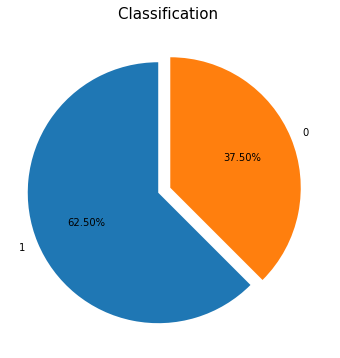

In [26]:
attr_count=df['classification'].value_counts()
attr_label=df['classification'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=(0.1,0),labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

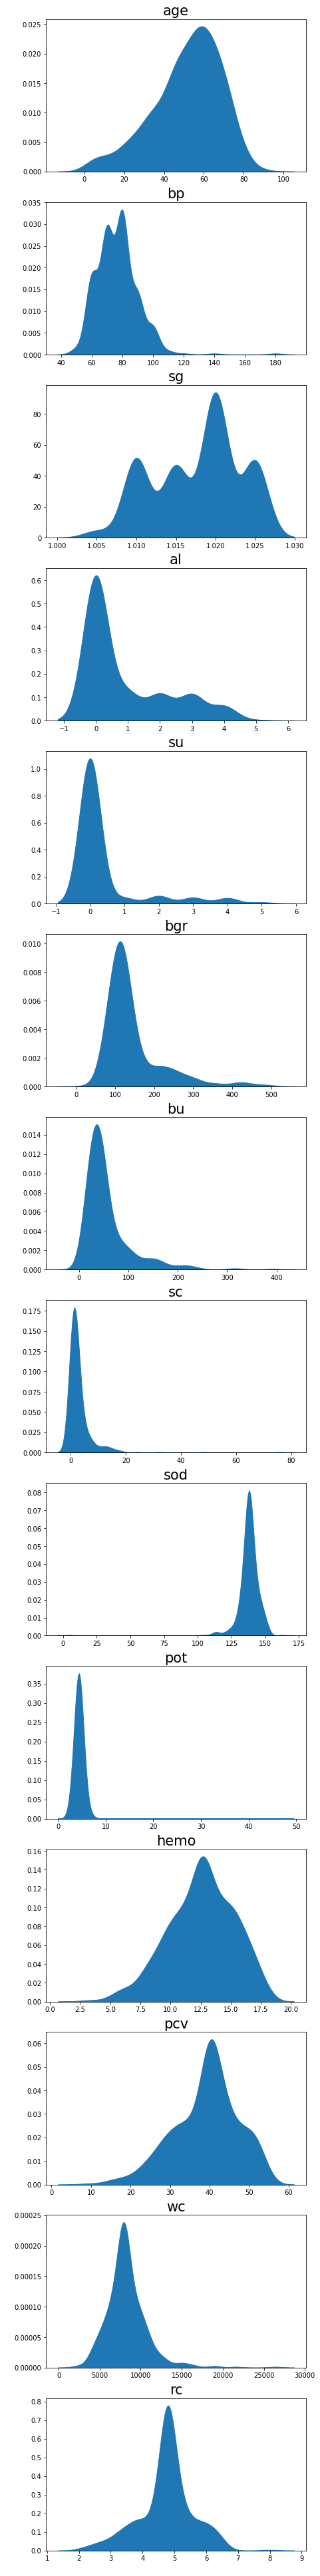

In [27]:
fig,ax=plt.subplots(figsize=(7,70),ncols=1,nrows=14)

i=0
for col in num_cols:
    sns.kdeplot(x=df[col],fill=True,alpha=1,ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col,fontsize=21)
    i=i+1
plt.show()

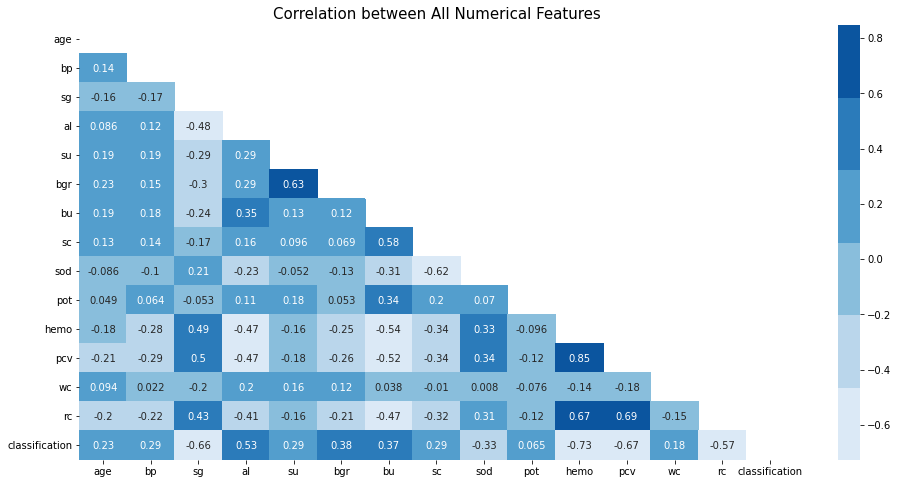

In [28]:
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Features',size=15)

# create mask
mask=np.triu(np.ones_like(df.corr()))

# create colormap
colormap=sns.color_palette('Blues')
# plot heatmap
sns.heatmap(df.corr(),annot=True,cmap=colormap,mask=mask)
plt.show()

In [29]:
df.drop('pcv',axis=1,inplace=True)
num_cols.remove('pcv')

In [30]:
tg_num_corr=[]

for col in num_cols:
    tg_num_corr.append(df[col].corr(df['classification']))
    
# create as DataFrame
tg_num_df=pd.DataFrame({'numerical_predictor':num_cols,'correlation_w_target':tg_num_corr})

# sort the DataFrmae by the absolute vaue of their correlation coefficient,descending
tg_num_df=tg_num_df.sort_values(by='correlation_w_target',ascending=False).reset_index(drop=True)

tg_num_df

,numerical_predictor,correlation_w_target
0,al,0.531562
1,bgr,0.379321
2,bu,0.369393
3,su,0.294555
4,bp,0.293693
5,sc,0.291245
6,age,0.227842
7,wc,0.177571
8,pot,0.065218
9,sod,-0.334900


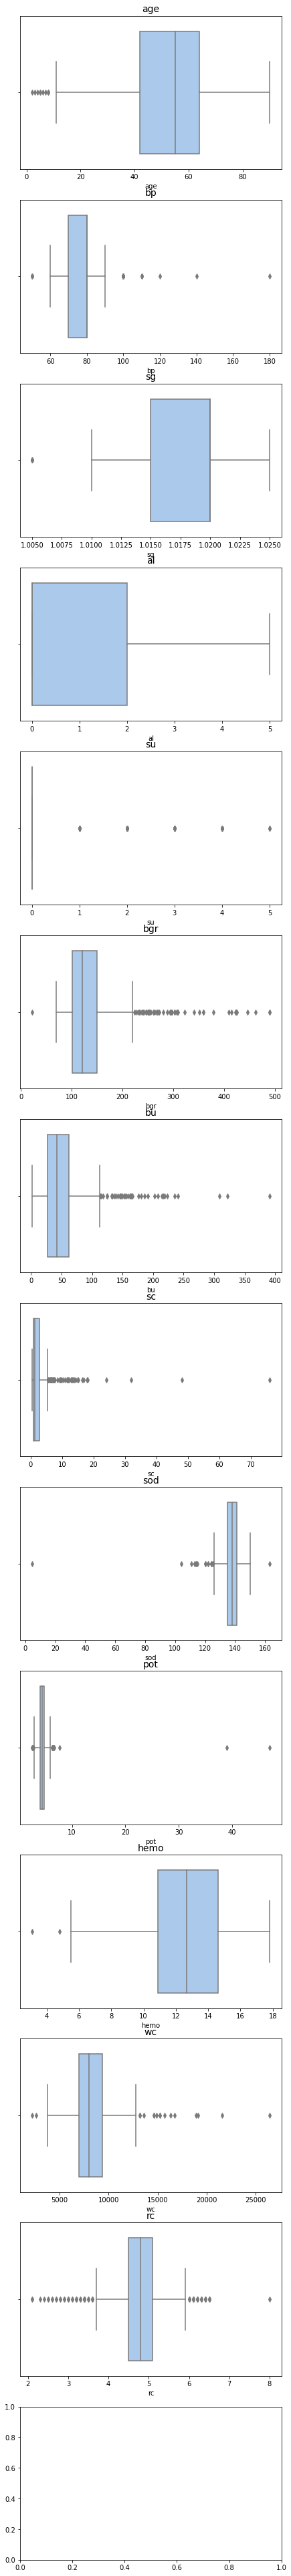

In [31]:
fig,ax=plt.subplots(ncols=1,nrows=14,figsize=(7,70))
i=0
for col in num_cols:
    sns.boxplot(data=df,x=col,ax=ax[i],palette='pastel')
    ax[i].set_title(col,fontsize=14)
    i=i+1
    
plt.show()

In [32]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler           
mm_scaler=MinMaxScaler()
df[num_cols]=mm_scaler.fit_transform(df[num_cols])

**Spliting into dependent and independent**

In [34]:
x=df.drop('classification',axis=1)
y=df['classification']

**Splitting into test split and train split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 23) , X_test size (80, 23)
